<a href="https://colab.research.google.com/github/matiaspass/Data-Science/blob/main/Challenge_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge para aspirantes al puesto de Data Scientist**

##Análisis exploratorio de datos (EDA) del dataset

A continuación se realizará un análisis exploratorio para ver la forma, tipo y tamaño de nuestro dataset.

In [1]:
# Vinculamos Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
path = "/content/drive/MyDrive/Challenge_VENG/bank-full.csv"
bank_df = pd.read_csv(path) 
# Para garantizar la reproducibilidad
np.random.seed(0)

In [105]:
# Observamos las primeras filas de nuestros datos
print(bank_df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [106]:
# Vemos la forma y los nombres de columnas
print('Cantidad de Filas y columnas:',bank_df.shape)
print('Nombre columnas:',bank_df.columns)

Cantidad de Filas y columnas: (45211, 17)
Nombre columnas: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [107]:
# Verificamos columnas, valores nulos y tipos de datos
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Para este caso se puede observar que no existen valores nulos. Y se tienen datos del tipo object e int64.

In [108]:
# Vemos cuantas muestras hay de cada clase

print(pd.value_counts(bank_df['y'], sort = True))

no     39922
yes     5289
Name: y, dtype: int64


Se observa que son 45.211 filas y solamente 5289 son la clase minoritaria con los casos donde el cliente accedio al servicio que ofreció el banco. Representan el 11% de las muestras.

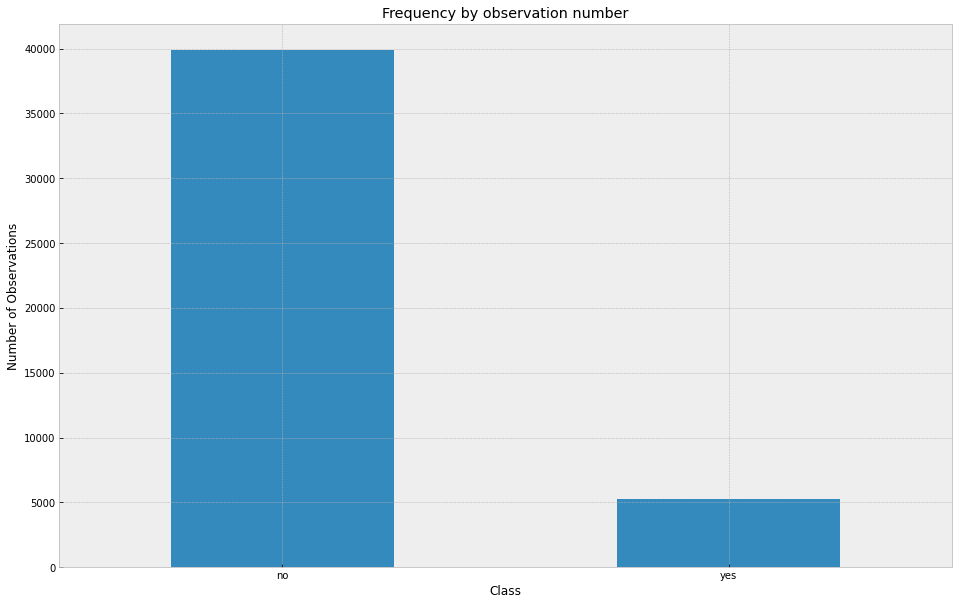

In [109]:

count_classes = pd.value_counts(bank_df['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

Debido a que hay un menor número de muestras de una clase que de la otra es que se debe blancear las mismas ya que pueden traer problemas a la hora de que el modelo clasifique. Esta información servirá para cuando se deba aplicar el modelo.

In [110]:
# Realizamos una descripción estadística de los datos
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Se realizan graficas de los datos para un análisis visual de los mismos.

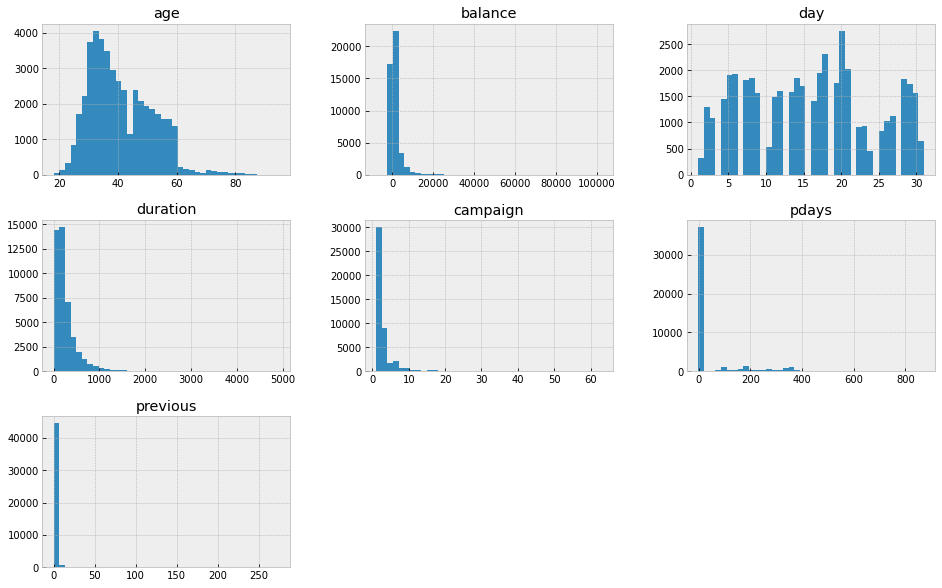

In [111]:
# Se visualizan rápidamente las caraterísticas de entrada
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('bmh')
bank_df.hist(bins=40)
plt.show()

Se realizan gráficas de cajas y bigotes para observar mejor la distribución.

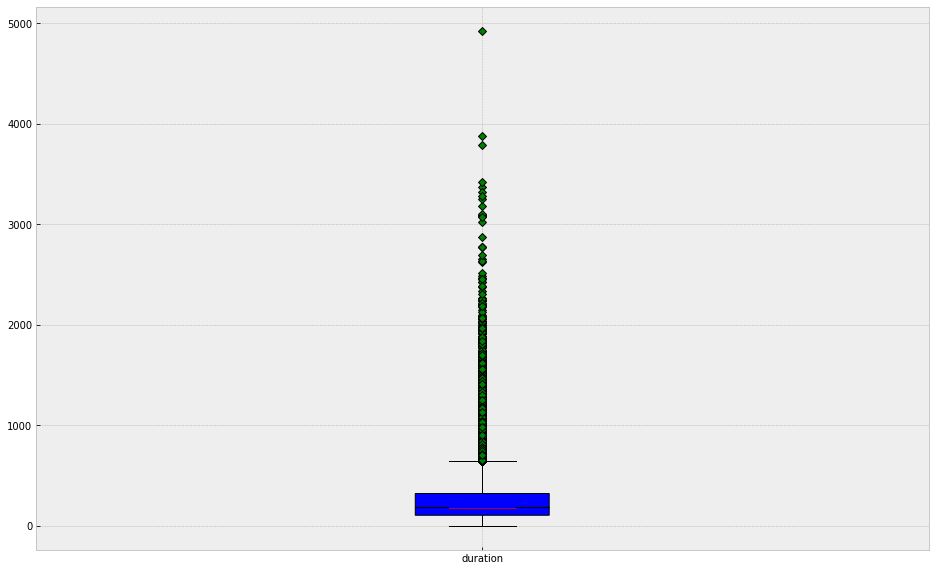

In [112]:
plt.rcParams['figure.figsize'] = (16, 10)
# Visualizamos rápidamente las caraterísticas de entrada
green_diamond = dict(markerfacecolor='g', marker='D')
data = [bank_df['duration']]
plt.boxplot(data,labels=['duration'], notch = True, patch_artist=True, flierprops=green_diamond)
  
plt.show() 

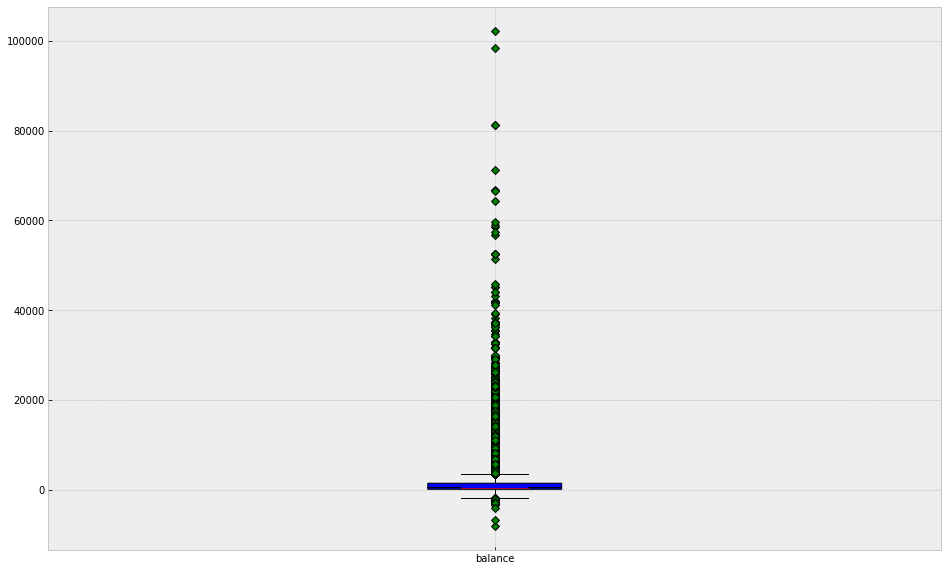

In [113]:
# Visualizamos rápidamente las caraterísticas de entrada
green_diamond = dict(markerfacecolor='g', marker='D')
data = [bank_df['balance']]
plt.boxplot(data,labels=['balance'], notch = True, patch_artist=True, flierprops=green_diamond)
  
plt.show() 

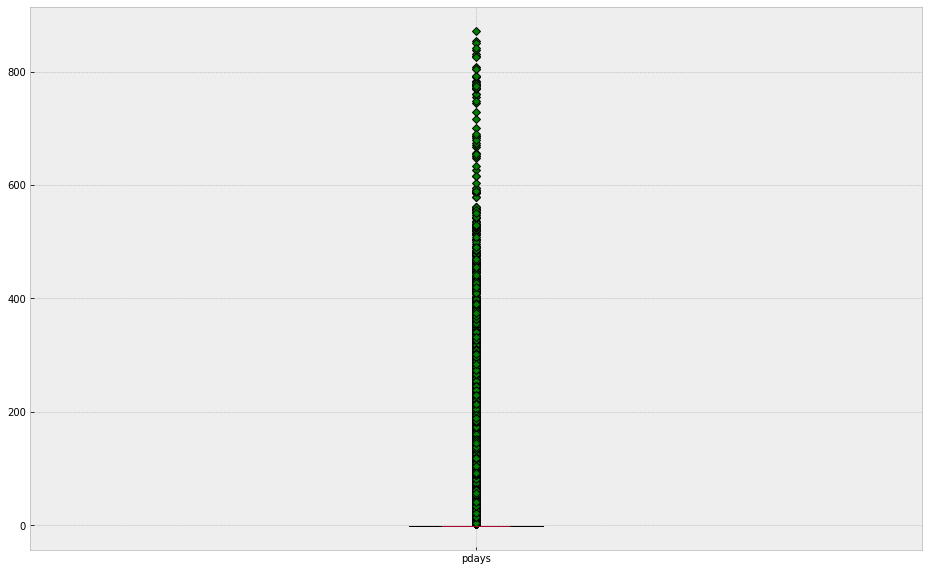

In [114]:
# Visualizamos rápidamente las caraterísticas de entrada
green_diamond = dict(markerfacecolor='g', marker='D')
data = [bank_df['pdays']]
plt.boxplot(data,labels=['pdays'], notch = True, patch_artist=True, flierprops=green_diamond)
  
plt.show() 

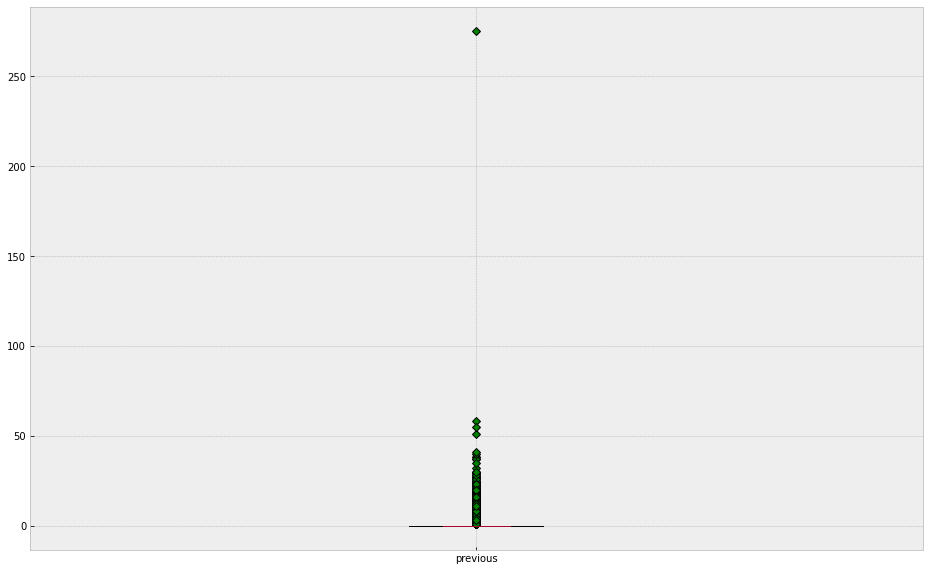

In [115]:
# Visualizamos rápidamente las caraterísticas de entrada
green_diamond = dict(markerfacecolor='g', marker='D')
data = [bank_df['previous']]
plt.boxplot(data,labels=['previous'], notch = True, patch_artist=True, flierprops=green_diamond)
  
plt.show() 

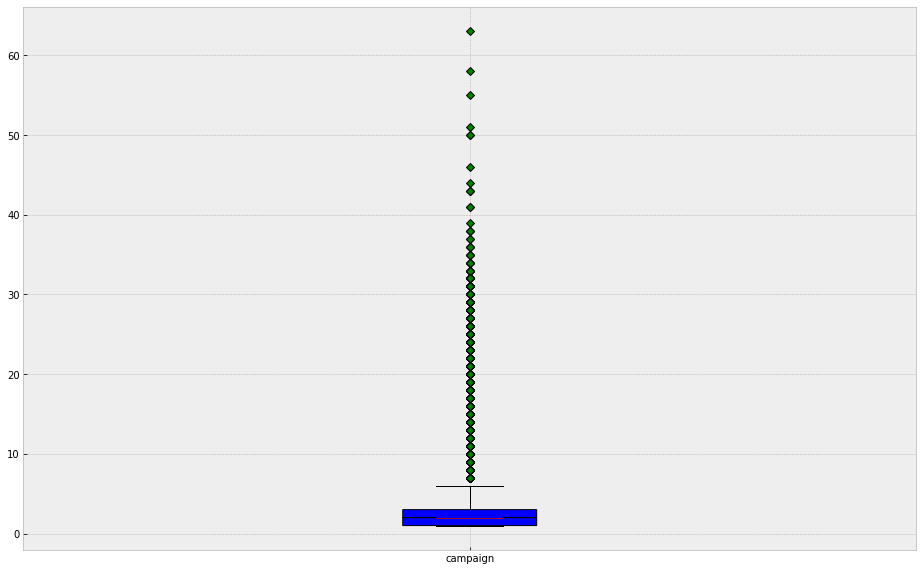

In [116]:
# Visualizamos rápidamente las caraterísticas de entrada
green_diamond = dict(markerfacecolor='g', marker='D')
data = [bank_df['campaign']]
plt.boxplot(data,labels=['campaign'], notch = True, patch_artist=True, flierprops=green_diamond)
  
plt.show() 

De las gráficas anteriores se puede observar que los datos están concentrados en la mayoría de los casos excepto para las variables age y day.
Por otro lado en todos los casos se observa valores outliers por fuera de los bigotes. 

#Proceso de Transformación

Dado que se tienen variables del tipo object se transformar para poder utilizarlas en las estimaciones de alguno de los modelos que se vayan a realizar. Para ello se codifican las varibles categóricas utilizando pandas.

In [117]:
pd.get_dummies(bank_df, columns=["default", "housing", "loan", "y"])

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,previous,poutcome,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,58,management,married,tertiary,2143,unknown,5,may,261,1,...,0,unknown,1,0,0,1,1,0,1,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,...,0,unknown,1,0,0,1,1,0,1,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,...,0,unknown,1,0,0,1,0,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,...,0,unknown,1,0,0,1,1,0,1,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,...,0,unknown,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,...,0,unknown,1,0,1,0,1,0,0,1
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,...,0,unknown,1,0,1,0,1,0,0,1
45208,72,retired,married,secondary,5715,cellular,17,nov,1127,5,...,3,success,1,0,1,0,1,0,0,1
45209,57,blue-collar,married,secondary,668,telephone,17,nov,508,4,...,0,unknown,1,0,1,0,1,0,1,0


Para no tener tantas columnas se eliminan la primer columna de cada vaiable ya así nos queda solo la columna 'yes' de la codificación por lo cual ahora quedará 1 para el caso positivo y cero para el caso negativo.

In [118]:
bank_df = pd.get_dummies(bank_df, columns = ["default", "housing", "loan", "y"], drop_first = True)

También se codifican las otras varibles categóricas no binarias. En este caso el procedimiento es diferente ya que se debe asignar de manera "manual" dichos valores. En caso de que haya algún tipo de ordinalidad se realiza el procedimiento respetando la misma.

Para ello el enfoque más sencillo es reemplazar cada etiqueta / categoría por algún número ordinal basado en los rangos. 

Implementación:

Paso 1: Cree un diccionario con clave como categoría y valores con su rango.

Paso 2: Cree una nueva columna y asigne la columna ordinal con el diccionario creado.

Paso 3: suelte la columna original.

Estos pasos anteriores se ralizan para cada variable

In [119]:
# job
# 1. 
jobdict =   {   'admin.':1,
                    'unknown':2,
                     'unemployed':3,
                     'management':4,
                     'housemaid':5,
                    'entrepreneur':6,
                    'student':7,
                    'blue-collar':8,
                    'self-employed':9,
                    'retired':10,
                    'technician':11,
                    'services':12,                
                }
# 2. 
bank_df['ordinal_job'] = bank_df.job.map(jobdict)
# Display result
      
bank_df[['age', 'job', 'ordinal_job']].head(10)
# 3.
bank_df = bank_df.drop('job', axis = 1)

In [120]:
# marital
# 1. 
maritaldict =   {   'married':1,
                    'divorced':2,
                     'single':3,              
                }
# 2. 
bank_df['ordinal_marital'] = bank_df.marital.map(maritaldict)
# Display result
      
bank_df[['age', 'marital', 'ordinal_marital']].head(10)
# 3.
bank_df = bank_df.drop('marital', axis = 1)

In [121]:
# education
# 1. 
educationdict =   {   'unknown':1,
                    'secondary':2,
                     'primary':3,
                    'tertiary':4,              
                }
# 2. 
bank_df['ordinal_education'] = bank_df.education.map(educationdict)
# Display result
      
bank_df[['age', 'education', 'ordinal_education']].head(10)
# 3.
bank_df = bank_df.drop('education', axis = 1)

In [122]:
# contact
# 1. 
contactdict =   {   'unknown':1,
                    'telephone':2,
                     'cellular':3,           
                }
# 2. 
bank_df['ordinal_contact'] = bank_df.contact.map(contactdict)
# Display result
      
bank_df[['age', 'contact', 'ordinal_contact']].head(10)
# 3.
bank_df = bank_df.drop('contact', axis = 1)

In [123]:
# month
# 1. 
monthdict =   {   'jan':1,
                    'feb':2,
                     'mar':3,
                     'apr':4,
                     'may':5,
                    'jun':6,
                    'jul':7,
                    'aug':8,
                    'sep':9,
                    'oct':10,
                    'nov':11,
                    'dec':12,                
                }
# 2. 
bank_df['ordinal_month'] = bank_df.month.map(monthdict)
# Display result
      
bank_df[['age', 'month', 'ordinal_month']].head(10)
# 3.
bank_df = bank_df.drop('month', axis = 1)

In [124]:
# poutcome
# 1. 
poutcomedict =   {   'unknown':1,
                    'other':2,
                     'failure':3,
                    'success':4,              
                }
# 2. 
bank_df['ordinal_poutcome'] = bank_df.poutcome.map(poutcomedict)
# Display result
      
bank_df[['age', 'poutcome', 'ordinal_poutcome']].head(10)
# 3.
bank_df = bank_df.drop('poutcome', axis = 1)

In [125]:
bank_df.head()

,age,balance,day,duration,campaign,pdays,previous,default_yes,housing_yes,loan_yes,y_yes,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome
0,58,2143,5,261,1,-1,0,0,1,0,0,4,1,4,1,5,1
1,44,29,5,151,1,-1,0,0,1,0,0,11,3,2,1,5,1
2,33,2,5,76,1,-1,0,0,1,1,0,6,1,2,1,5,1
3,47,1506,5,92,1,-1,0,0,1,0,0,8,1,1,1,5,1
4,33,1,5,198,1,-1,0,0,0,0,0,2,3,1,1,5,1


Se observan si existe alguna correlación lineal de las variables con la variable objetivo

In [126]:
print(bank_df.corrwith(bank_df.y_yes))

age                  0.025155
balance              0.052838
day                 -0.028348
duration             0.394521
campaign            -0.073172
pdays                0.103621
previous             0.093236
default_yes         -0.022419
housing_yes         -0.139173
loan_yes            -0.068185
y_yes                1.000000
ordinal_job         -0.024649
ordinal_marital      0.065668
ordinal_education    0.046539
ordinal_contact      0.148395
ordinal_month        0.018717
ordinal_poutcome     0.221128
dtype: float64


Se puede ver que hay una correlación media directa con 'duration' y sueve con las variables 'pdays', 'ordinal_contact' y 'ordinal_poutcome'.

Se grafica la matriz de correlación entre todas las varialbes para visualizar de forma gráfica si existe algún tipo de dependencia lineal entre las variables.

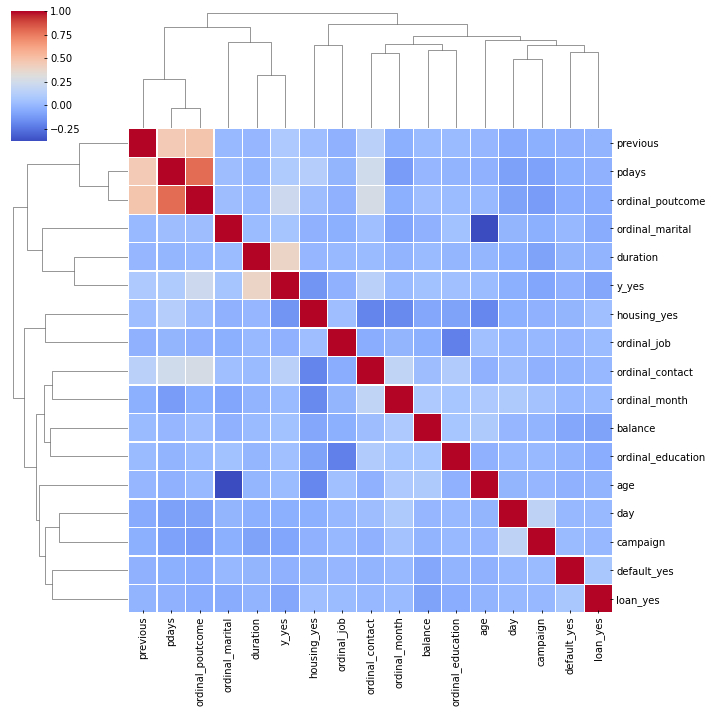

In [127]:
corr = bank_df.corr()

cg = sns.clustermap(corr.fillna(0), cmap ='coolwarm', linewidths = 0.2,
                    method = 'complete', xticklabels=1,figsize = (10,10)) 
cg

Se observa una dependencia lineal entre las variables 'previous', 'pdays' y 'ordinal_outcome'. Además hay una relación lineal entre 'duration' y 'y_yes'.

#A continuación se realiza el desarrollo de los modelos de predicción

Dado que el problema al que nos enfrentamos es de clasificación binaria es que se aplicarán algunos modelos de aprendizaje supervisado de clasificación. En este caso se utilizarán dos modelos sencillos pero que tienen muy buenos resultados para el tipo de datos que disponemos.

#**Árboles de Decisión**

Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

**Se selecciona la variable a predecir**

La variable objetivo es "y_yes" 

In [128]:
y = bank_df.y_yes

**Se seleccionan las "Features"**

En este momento se eligen cuales son las variables que se utilizaran para realizar la predicción en el modelo. Se puede trabajar con todas las variables o algunas veces se seleccionan las que se consideran más relevantes.
Para este caso se utilizan todas las variables excepto Id y T_AB.

In [129]:
bank_features = bank_df.drop(['y_yes'], axis=1)

#**Se Construye el Modelo**

Para ello se utiliza la librería **scikit-learn**. Al realizar la codificación es escrita como **sklearn**.

Los pasos que se utilizan para construir el modelo son:

**Definición:** Que tipo de modelo se usará? Se definen los parámetros del modelo seleccionado.

**Fit (Ajuste):** Se "capturan" patrones de los datos provistos. Es la parte esencial del modelado.

**Predicción:** Es la predicción literal del modelo.

**Evaluación:** Se determina la precisión del modelo con los datos de validación.

Se dividen los datos en dos conjuntos, uno de entrenamiento y otro de validación del modelo. De esta menera se corrobora que el modelo es válido para predecir con nuevos datos.

## **Aplicación del Modelo**

In [130]:
# Se descargan las librerías y complementos necesarios

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(0)


Se separan los conjuntos de entrenamiento y prueba

In [131]:
train_X, val_X, train_y, val_y = train_test_split(bank_features, y, test_size=0.2, random_state = 0)

Antes de entrenar el modelo, se utiliza un GridSearch para encontrar los hiperparámetros `max_depth` y `max_leaf_nodes` óptimos.

Además se realiza un ajuste de parámetros para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Para nuestro caso utilizaremos el parámetro class_weight= “balanced”. Cabe mencionar que no todos los algoritmos tienen estas posibilidades.

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_param = {'max_depth':np.arange(2,20), 'max_leaf_nodes':np.arange(2,20)}

dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

grid = GridSearchCV(dt, grid_param , n_jobs=-1, cv=5)

grid.fit(train_X,train_y)
print(grid.best_params_)
print("")
print(grid.best_estimator_)

{'max_depth': 6, 'max_leaf_nodes': 19}

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=19,
                       random_state=42)


Se encuentra que el mejor modelo es el que tiene max deph = 6, max leaf nodes = 19 y el random states = 42. Con estos valores se realiza la predicción.

In [133]:
# Se elege como modelo el mejor estimador encontrado anteriormente
model = grid.best_estimator_

# Se Entrena el modelo
model.fit(train_X,train_y) 

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=19,
                       random_state=42)

A continuación se calcula cual es la importancia de cada predictor en el modelo. Ésta se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [134]:
model.feature_importances_

array([0.0097331 , 0.        , 0.00762394, 0.56424044, 0.        ,
       0.00994849, 0.        , 0.        , 0.06719111, 0.01272875,
       0.        , 0.        , 0.        , 0.12458953, 0.05356575,
       0.1503789 ])

De los resultados anteriores se puede concluir que para el modelo las variables 'duration', 'ordinal_contact' y 'ordinal_poutcome' son las que más relevancia tienen para la predicción. Es decir,la duración de la llamada y el resutado de la campaña anterior.

# Visualización del output del modelo

Con la visualización del modelo el objetivo es obtener una métrica que nos permita conocer y evaluar que tan bueno es nuestro modelo para predecir.
Esto se realiza a traves del informe de clasificación y la evaluación del área bajo la curva ROC (AUC).

              precision    recall  f1-score   support

           0       0.97      0.79      0.88      7980
           1       0.35      0.84      0.49      1063

    accuracy                           0.80      9043
   macro avg       0.66      0.82      0.69      9043
weighted avg       0.90      0.80      0.83      9043



Text(40.82000000000001, 0.5, 'Clases Predichas')

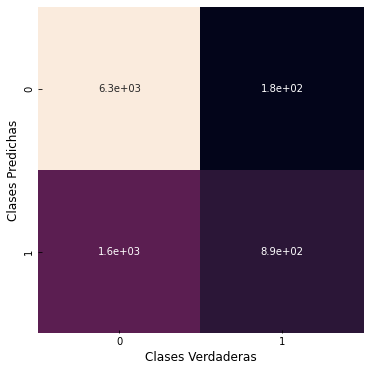

In [135]:
# Confusion Matrix y Reporte
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Se obtienen algunas predicciones para evaluar el rendimiento del modelo
y_fit = model.predict(val_X)

print(classification_report(val_y,y_fit))

cm = confusion_matrix(val_y,y_fit)

plt.figure(figsize=(6,6))
sns.heatmap(cm.T ,square=True , annot=True, cbar=False, xticklabels=True)
plt.xlabel('Clases Verdaderas')
plt.ylabel('Clases Predichas')

El valor de precisión del modelo es de 80%.
Si se mira en detalle reporte de clasificación se puede ver que el modelo es capaz de detectar los casos en que el cliente se suscribe a una cuenta de banco (recall alto), aunque el modelo no es tan confiable (precision 0.35) para detectar si dicho punto pertenece a esa clase y un f1 score aceptable, siempre refiriendonos al caso en que la clase toma valor 1. En el caso de la clase negativa (cuando el cliente no se suscribe a la cuenta de banco) el modelo es muy bueno para identificarlas dando todos los valores muy bien.

Se realiza el calculo de la curva ROC.
ROC es una curva de probabilidad para diferentes clases la cual nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha.

El área cubierta por la curva es el área entre la línea naranja (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de Machine Learning para distinguir las clases dadas. El valor ideal para AUC es 1.

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Definición de una función de Python para trazar las curvas ROC.

In [137]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

Predecir probabilidades para los datos de prueba.

In [138]:
probs = model.predict_proba(val_X)

Mantenga solo las probabilidades de la clase positiva

In [139]:
probs = probs[:, 1]

Calcule la puntuación AUC

In [140]:
auc = roc_auc_score(val_y, probs)
print('AUC: %.2f' % auc)

AUC: 0.87


Se obtiene un valor del área bajo la curva de 0.87 de un máximo ideal de 1, por lo cual se puede decir que es una buena predicción.

Obtenga la curva ROC

In [141]:
fpr, tpr, thresholds = roc_curve(val_y, probs)

Trace la curva ROC usando nuestra función definida

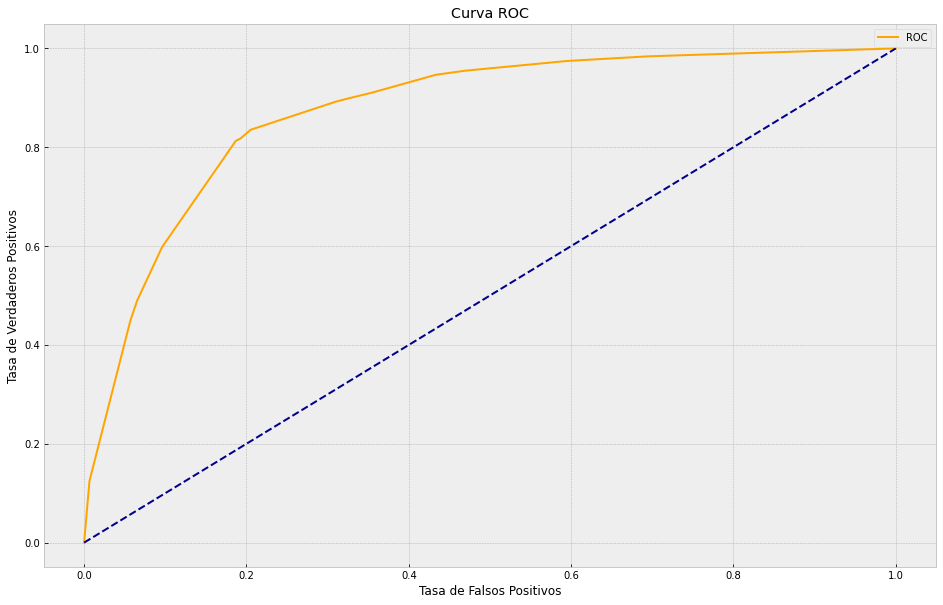

In [142]:
plot_roc_curve(fpr, tpr)

A continuación se raliza la gráfica del árbol obtenido

[Text(0.4880952380952381, 0.9285714285714286, 'X[3] <= 205.5\ngini = 0.5\nsamples = 36168\nvalue = [18084.0, 18084.0]'),
 Text(0.23809523809523808, 0.7857142857142857, 'X[15] <= 3.5\ngini = 0.345\nsamples = 20378\nvalue = [11118.076, 3166.626]'),
 Text(0.19047619047619047, 0.6428571428571429, 'X[14] <= 4.5\ngini = 0.288\nsamples = 19939\nvalue = [10982.2, 2315.06]'),
 Text(0.09523809523809523, 0.5, 'X[3] <= 87.5\ngini = 0.486\nsamples = 3018\nvalue = [1562.011, 1108.319]'),
 Text(0.047619047619047616, 0.35714285714285715, 'gini = 0.208\nsamples = 981\nvalue = [545.77, 72.747]'),
 Text(0.14285714285714285, 0.35714285714285715, 'X[8] <= 0.5\ngini = 0.5\nsamples = 2037\nvalue = [1016.241, 1035.572]'),
 Text(0.09523809523809523, 0.21428571428571427, 'X[2] <= 27.5\ngini = 0.464\nsamples = 1020\nvalue = [469.905, 813.053]'),
 Text(0.047619047619047616, 0.07142857142857142, 'gini = 0.416\nsamples = 738\nvalue = [317.611, 757.423]'),
 Text(0.14285714285714285, 0.07142857142857142, 'gini = 0.39

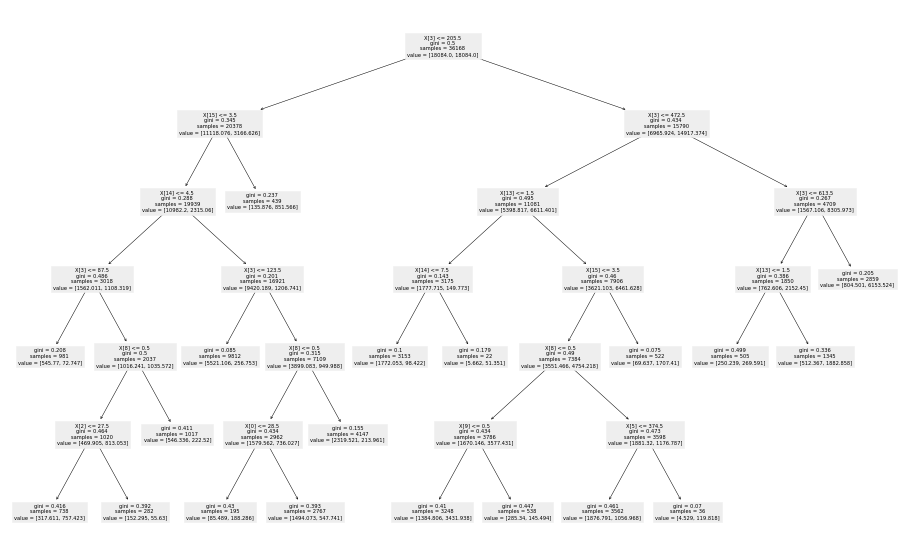

In [143]:
from sklearn import tree
tree.plot_tree(model)

#**Random Forest**

A continuación se aplica el modelo de random forest para ver si mejoran las predicciones.

In [144]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier()
model_r.fit(train_X, train_y)

RandomForestClassifier()

# Visualización del modelo

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7980
           1       0.61      0.42      0.50      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



Text(40.82000000000001, 0.5, 'Clases Predichas')

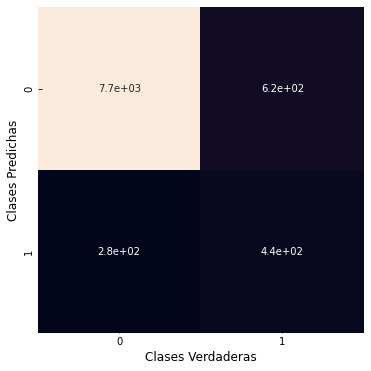

In [145]:
# Se obtienen algunas predicciones para evaluar el rendimiento del modelo
y_fit_r = model_r.predict(val_X)

print(classification_report(val_y,y_fit_r))

cm = confusion_matrix(val_y,y_fit_r)

plt.figure(figsize=(6,6))
sns.heatmap(cm.T ,square=True , annot=True, cbar=False, xticklabels=True)
plt.xlabel('Clases Verdaderas')
plt.ylabel('Clases Predichas')

El valor de precisión aquí también es de 90%.
En este caso ocurre que el modelo no es bueno para odentificar la clase positiva.

- Si se realiza el calculo del área bajo la curva ROC

Predecir probabilidades para los datos de prueba.

In [146]:
probs = model_r.predict_proba(val_X)

Mantenga solo las probabilidades de la clase positiva

In [147]:
probs = probs[:, 1]

Calcule la puntuación AUC

In [148]:
auc = roc_auc_score(val_y, probs)
print('AUC: %.2f' % auc)

AUC: 0.93


En este caso se ve que hay una mejoría en el valor del área bajo la curva, el cual es de 0.93

Obtenga la curva ROC

In [149]:
fpr, tpr, thresholds = roc_curve(val_y, probs)

Trace la curva ROC usando nuestra función definida

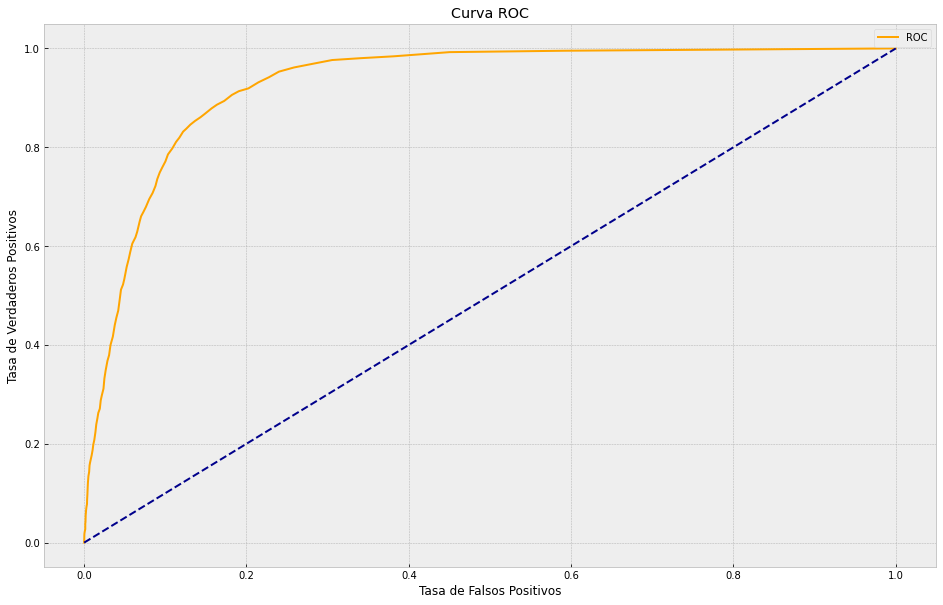

In [150]:
plot_roc_curve(fpr, tpr)

Se imprimen los valores conocidos con las predicciones para el modelo de Desicion Trees el cual tuvo mejores resultados para clasificar los casos positivos.

In [152]:
print("Realizando predicciones para las primeras 5 posibles suscripciones:")
print(val_X.head(5))
print("Las predicciones son")
print(model.predict(val_X.head(5)))

Realizando predicciones para las primeras 5 posibles suscripciones:
       age  balance  day  duration  campaign  pdays  previous  default_yes  \
14001   37     1403   10        91        15     -1         0            0   
32046   36     -253   14      1073         1     -1         0            0   
13318   47     -406    8       243         5     -1         0            0   
42991   57      501   11       105         7    188         2            0   
14237   33     -406   14       332         2     -1         0            1   

       housing_yes  loan_yes  ordinal_job  ordinal_marital  ordinal_education  \
14001            1         0            4                1                  4   
32046            1         0           12                3                  2   
13318            0         1            8                1                  3   
42991            1         1            5                1                  3   
14237            1         1            8                1

A continuación se exportarán las predicciones para agregarlas en la base de datos creada en el punto 1.

In [153]:
val_X.shape

(9043, 16)

In [154]:
Pred_data = pd.DataFrame({"prediction" : y_fit})

Pred_data

,prediction
0,0
1,1
2,0
3,0
4,0
...,...
9038,1
9039,0
9040,0
9041,1


Si ahora reemplazamos los núemros por las palabras para mayor claridad

In [157]:
Pred_data["prediction"] = Pred_data["prediction"].replace([0, 1], ('no', 'yes'))

In [158]:
# Chequeamos 
Pred_data

,prediction
0,no
1,yes
2,no
3,no
4,no
...,...
9038,yes
9039,no
9040,no
9041,yes


In [159]:
# Con el siguiente código se exportan las predicciones a un archivo csv

Pred_data.to_csv('predicciones.csv', index = False)

#**CRITERIO DE MÉTRICAS DE EVALUACIÓN**

Para ambas métricas de evaluación se consideró que la contidad de muestras que se pueden obtener por día son límitadas (discretas) para lo cual se necesitán métricas que puedan trabajar con dicha información, procesarla y dar resultados concretos.

**Informe de Clasificación**

El uso del informe de clasificación se le eligió ya que da una idea rápida de cómo se desempeñó el modelo. Devuelve los valores de Recall, Precision, F-Score para cada etiqueta de la variable objetivo, lo cual permite identificar de forma cuantitativa si el modelo está clasificando bien ambas clases.

**Matriz de Confusión**

Es una menera muy clara y gráfica de observar los FP, VP, FN y VN.
Consiste en una tabla o gráfico que representa la precisión de un modelo con respecto a dos o más clases. Las predicciones del modelo estarán en el eje X, mientras que los resultados / precisión se ubicarán en el eje Y.

Las celdas se llenan con la cantidad de predicciones que hace el modelo. Las predicciones correctas se pueden encontrar en una línea diagonal que se mueve desde la parte superior izquierda hacia la parte inferior derecha. Puede leer más sobre la interpretación de una matriz de confusión aquí.

**Área Bajo la Curva ROC (AUC)**

Es una métrica que se utiliza especialmente para problemas de clasificación binaria.
ROC es una curva de probabilidad para diferentes clases. Nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha.

Tiene una tasa de falsos positivos (FPR) en el eje X y una tasa de verdaderos positivos (TPR) en el eje Y.

El área cubierta por la curva es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos para distinguir las clases dadas. El valor ideal para AUC es 1.


#**Criterio de Elección del Modelo**


Se decidió optar por el **Modelo de Árbol de Decisión** debido a que es uno de los modelos más sencillos de aplicar para problemas de clasificación binaria, son fáciles de interpretar aun cuando las relaciones entre predictores son complejas (no linelaes) como en nuestro caso y no tienen tantos requerimientos para su aplicación. Además, se lo puede representar gráficamente lo cual permite un mayor entendimiento de como funciona en cuanto a la jerarquía de las decisiones que toma.
No es necesario que se cumpla ningún tipo de distribución específica.
Requiere mucha menos limpieza y preprocesado de los datos en comparación con otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).
No se ven muy influenciados por outliers.
Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.
Son capaces de seleccionar predictores de forma automática.

Luego se eligió el **Modelo de Random Forest** el cual es similar al modelo anterior pero mejora al trabajar mediante un conjunto (ensamble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping. Esto implica que cada árbol se entrena con unos datos ligeramente distintos. Lo cual tiene de ventaja que reduce el riesgo de overfitting.


#**CONCLUSIÓN**


En función de los resultados se puede decir que ambos modelos son aceptables, teniendo mejor performance el de Random Forest como era de esperarse. 

En ambos casos se trato de priorizar la clasificación de la clase 1 ya que es esos casos en los cuales el cliente se suscribe a la cuenta de banco. 

En caso de querer afinar un poco más el modelo se podría probar de realizar un trabajo sobre los outliers ya que en algunas de las variables estan muy fuera de rango. Se puede realizar un escalado de las variables ya que de esta manera al aplicar modelos más complejos como por ejemplo SVM el mismo no se vea perjudicado.

Se debe seguir trabajando para mejorar el código y crear pipelines que permitan tener más limpio, ágil y legible el trabajo.
